#### Ques 1. Find the longest continous increasing sequence


In [1]:
def longest_sequence(input_list):
    # """arg-> input list provided by the function """
    """
    This function Calculates the longest increasing sequence and returns the list of and the length of the list"""
    # Returns 
    # arg1 -> list containing the longest sequence
    # arg2 -> length of this sequence

    sequence_lst=[]     # Used for storing the increasing sequence untill smaller number is not encountered
    longest_sequence_lst=[] # Stores all the candidate lists from which longest list would be calculated
    i=0

    while i< (len(input_list)-1):       
        if input_list[i]<input_list[i+1]:
            sequence_lst.append(input_list[i])
            # If element is smaller than the next element it will append the element in a list and increases the value of i by 1
            i+=1
        elif input_list[i]>input_list[i-1]:
            # If the next element is smaller than it will check for previous one so that, this element could be added to the list  
            sequence_lst.append(input_list[i]) 
            i+=1
            longest_sequence_lst.extend([sequence_lst])
            # It adds this list to the list which contains all the candidate lists
            sequence_lst=[] # clears the list for a new cycle 

        # elif i==len(input_list):
        #     longest_sequence_lst.extend([sequence_lst])
        #     sequence_lst=[]
        else:
            i+=1
            continue
    """This code calculates the longest sequence and it's length from all the lits containg all the candidate sequences"""
    max_len=0
    longest_list=[]
    for i in longest_sequence_lst:
        if len(i)>max_len:
            max_len=len(i)
            longest_list=[i]
        elif len(i)==max_len:
            longest_list.append([i])

    return longest_list,max_len

lst=[1,2,3,4,10,12,5,1,2,5,6,8]
longest_sequence_list,length=longest_sequence(lst)
print("Longest Increasing sequemce is -> ",longest_sequence_list)
print("Length of the Sequence is -> ",length)

Longest Increasing sequemce is ->  [[1, 2, 3, 4, 10, 12]]
Length of the Sequence is ->  6


#### Ques 2 -> Rotate (n*n) matrix anti clock wise and clock wise

In [2]:
import numpy as np

def matrix_rotate(arr,direction):
    """
    arg1 -> input array
    arg2 -> direction
    """
    # This function takes the array as input and then uses the numpy rotate method to rotate the matrix
    if direction ==1:
        return (np.rot90(arr,-1))   # For clockwiese i have passed rotation to be 3 because it rotates the matrix in anti clockwise direction 
    # np.rot90(arr,rotation_time)
    # arr-> input array
    # rotate_time -> number of times the matrix would be rotated
    elif direction == -1:
        return (np.rot90(arr,1))    # For anti clockwise I have passed the rotation to be 1
    else:
        return "Please select one of the Two Options"

try:
    n=int(input("Please enter the size of matrix"))
    limit=int(input("Enter the maximum number of the matrix"))
    dir=int(input("Please select the direction on which you want to rotate the matrix" \
    "\n1 for Clockwise and -1 for Anti-clockwise "))
except ValueError:
    print("Please enter an integer value")

input_arr=np.random.randint(limit,size=(n,n))

rot_arr=matrix_rotate(input_arr,dir)

print("Original Matrix -> \n",input_arr)
print("\nRotated Array -> \n",rot_arr)

Original Matrix -> 
 [[2 0 2]
 [1 0 1]
 [0 3 1]]

Rotated Array -> 
 Please select one of the Two Options


#### Ques 3 -> Perform regression on the dataset and accuracy above 95%


In [128]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [129]:
np.__version__

'2.3.2'

In [130]:
emission_df=pd.read_csv(r"co2.csv")

In [131]:
emission_df.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255  
4                           27                  244

In [132]:
emission_df.info()
# OBSERBVATION -> There are 7385 records and 12 columns 
# Columns -> ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'] are object type columns
#         -> ['Engine Size(L)', 'Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)'] are float type columns
#         -> ['Cylinders', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'] are int type columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [133]:
emission_df.describe().T
#OBSERVATION -> The difference between the median and mean of all columns is less than 10% so that means the possibility for outliers in the dataset will be less

count        mean        std   min    25%  \
Engine Size(L)                    7385.0    3.160068   1.354170   0.9    2.0   
Cylinders                         7385.0    5.615030   1.828307   3.0    4.0   
Fuel Consumption City (L/100 km)  7385.0   12.556534   3.500274   4.2   10.1   
Fuel Consumption Hwy (L/100 km)   7385.0    9.041706   2.224456   4.0    7.5   
Fuel Consumption Comb (L/100 km)  7385.0   10.975071   2.892506   4.1    8.9   
Fuel Consumption Comb (mpg)       7385.0   27.481652   7.231879  11.0   22.0   
CO2 Emissions(g/km)               7385.0  250.584699  58.512679  96.0  208.0   

                                    50%    75%    max  
Engine Size(L)                      3.0    3.7    8.4  
Cylinders                           6.0    6.0   16.0  
Fuel Consumption City (L/100 km)   12.1   14.6   30.6  
Fuel Consumption Hwy (L/100 km)     8.7   10.2   20.6  
Fuel Consumption Comb (L/100 km)   10.6   12.6   26.1  
Fuel Consumption Comb (mpg)        27.0   32.0   69.0  
CO2 Emissions(g/km)               246.0  288.0  522.0

In [134]:
emission_df.isnull().sum()
# OBSERVATION -> There are not any null values present in the datasetso there's no need to handle missing values

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

#### Univariant Analysis

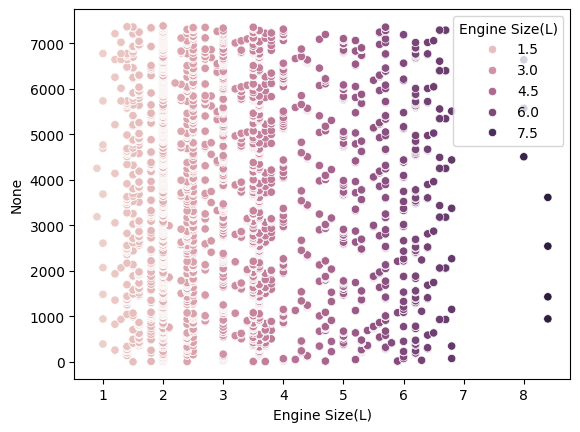

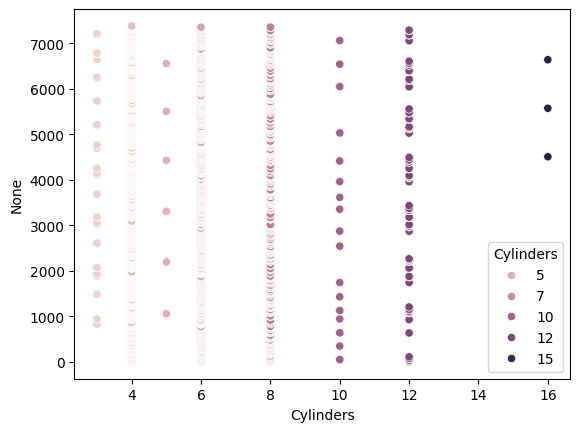

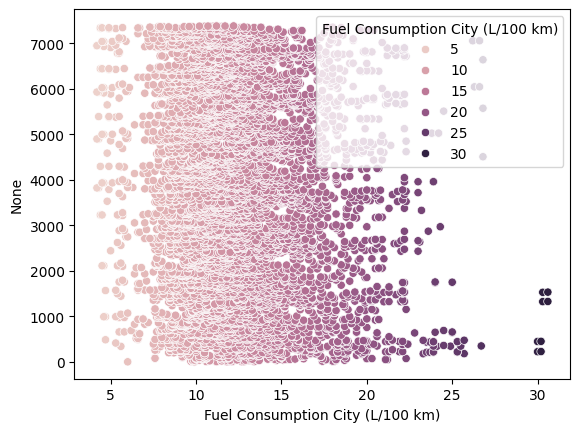

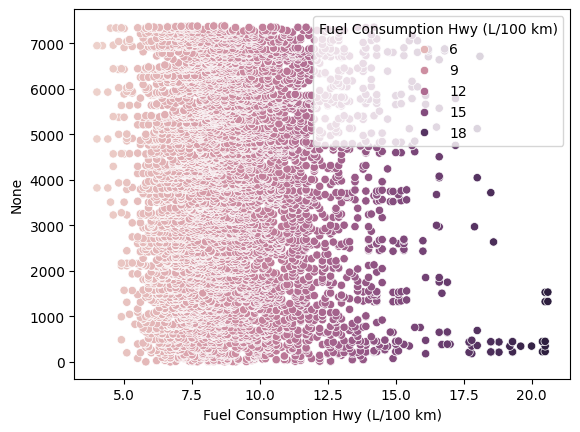

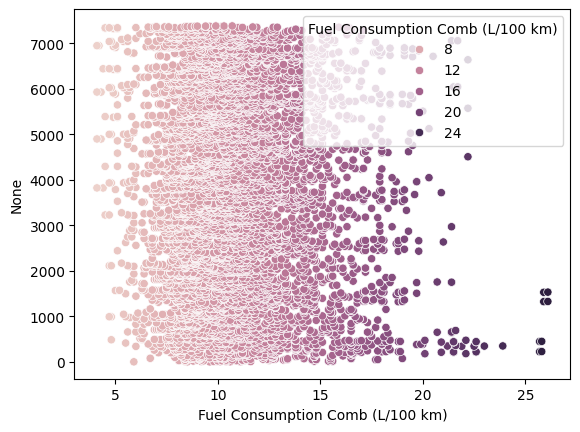

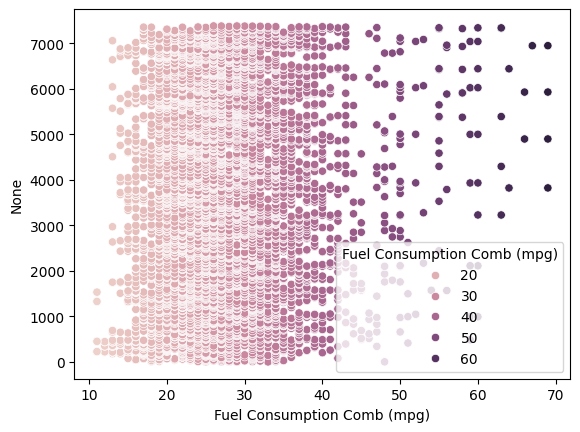

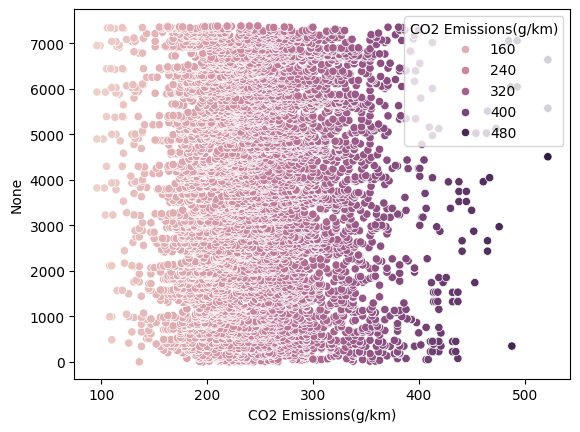

In [ ]:
for col in emission_df.select_dtypes("number").columns:
    plt.figure()
    sns.scatterplot(x=emission_df[col],data=emission_df,y=emission_df.index,hue=col)

#OBSERVATION -> Most of the size of engines is below (4L) and is hightly dense between 3 & 4 
#            -> Most Number of Cylinders are below 8 and mostly are like categoric
#            -> Fuel consumption in City is mostly between 7 to 20 (litres/100km)
#            -> Fuel consumption on Highway reduces to mosty 6 to 12 (litres/100km)
#            -> Combined fuel consumption is again between the 6 to 12 (litres/100km)range 
#            -> Combined fuel consumption(mpg) is between 16-35(miles)
#            -> CO2 emission of cars are mostly between 160-320(g/Km)

<Axes: xlabel='Fuel Type', ylabel='None'>

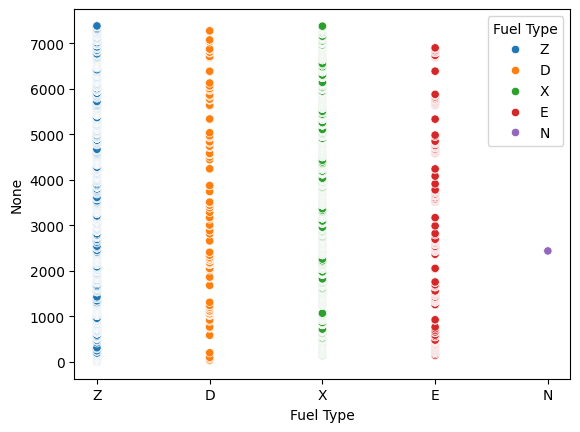

In [136]:
sns.scatterplot(x=emission_df["Fuel Type"],data=emission_df,y=emission_df.index,hue=emission_df["Fuel Type"])
# OBSERVATION-> MOst of the cars use Z and X types if fuel 
# and N type fuel is very rearly used

In [137]:
emission_df["Fuel Type"].value_counts()

Fuel Type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64

C:\Users\BAPS\AppData\Local\Temp\ipykernel_2128\12759588.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


'\n# OBSERVATION -> The max number of car by a single company is 628 by ford\n              -> The max number of particular model i.e. [F-150 FFV and F-150 FFV 4X4] are 32 \n              -> The max vehicle class is 1217 of SUV small\n              -> The most common engine size is 2.0L with 1460\n              -> MOst common cylinders are 4 and 6\n              -> The most common transmission is AS6 with 1324 cars having them\n              -> The most common Fuel type is X as 3637 cars have them\n              -> Most cars has fuel conumption for cities in betwwen 10-15 and the data is left skewed\n              -> Most cars has fuel conumption on highways is 6-10 between and data is left skewed\n              -> Combined fuel consumption follows the same pattern as pattern of city and highway\n              -> Combined fuel consumption(mpg) has most vlues between (6-35) and data is left skewed\n              -> CO2 emmission is between (200-300)\n'

<Figure size 640x480 with 0 Axes>

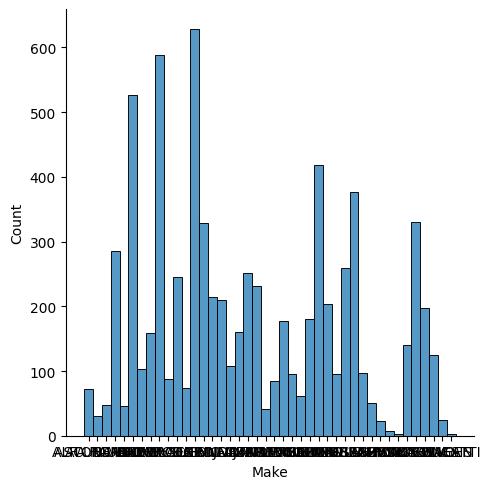

<Figure size 640x480 with 0 Axes>

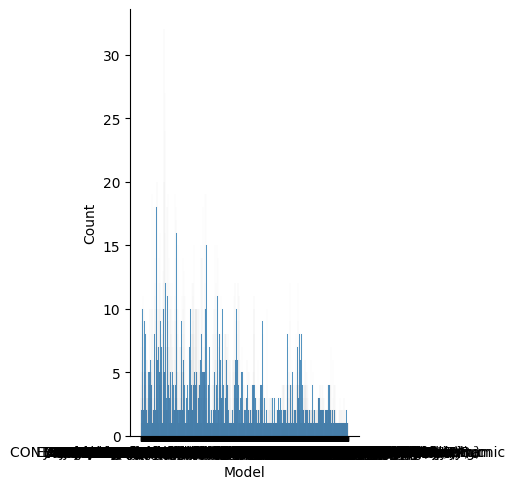

<Figure size 640x480 with 0 Axes>

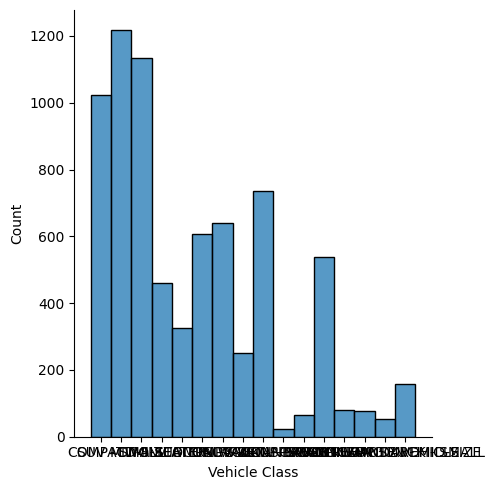

<Figure size 640x480 with 0 Axes>

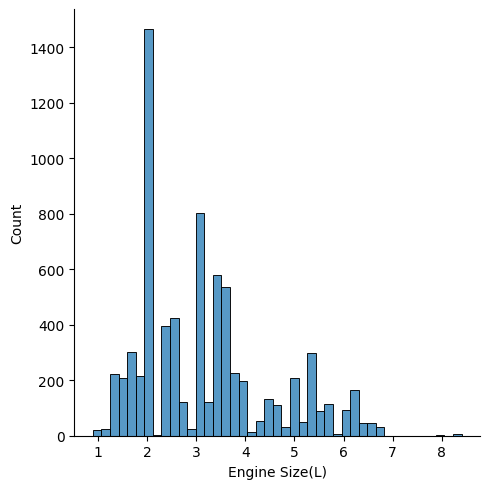

<Figure size 640x480 with 0 Axes>

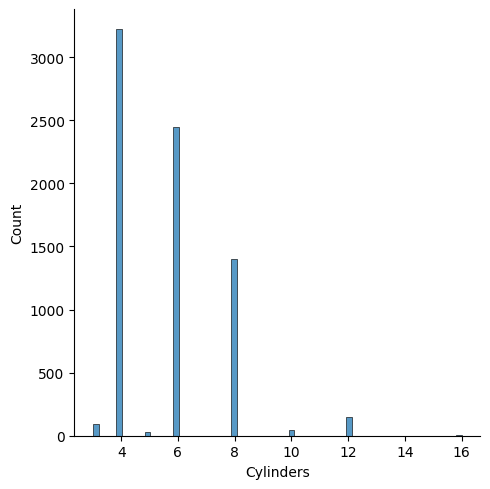

<Figure size 640x480 with 0 Axes>

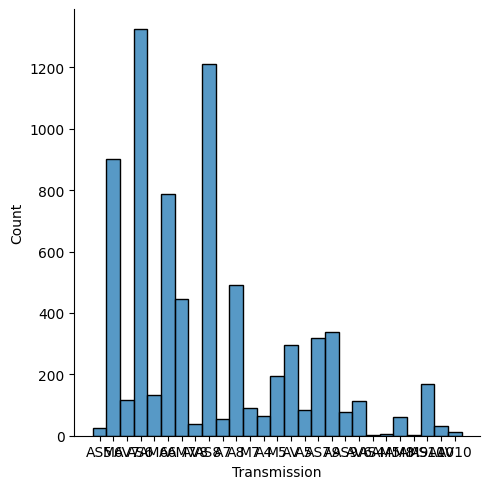

<Figure size 640x480 with 0 Axes>

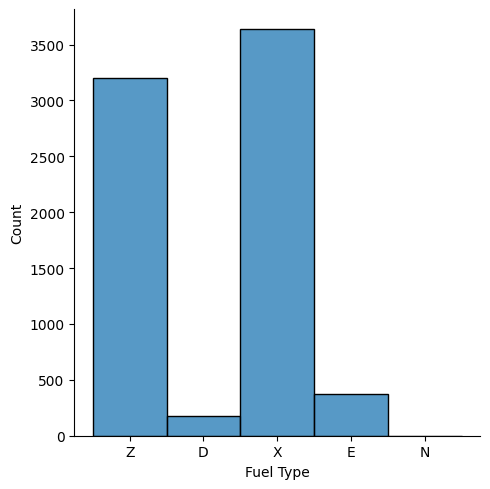

<Figure size 640x480 with 0 Axes>

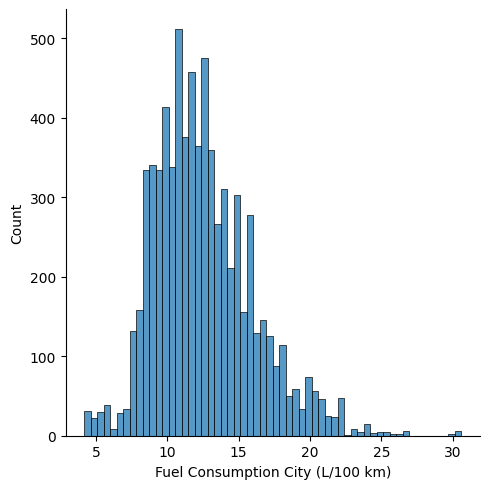

<Figure size 640x480 with 0 Axes>

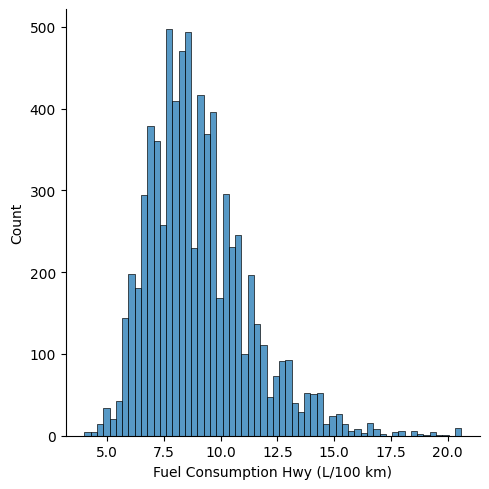

<Figure size 640x480 with 0 Axes>

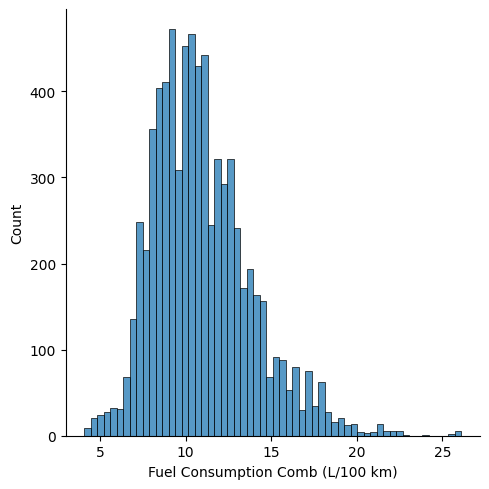

<Figure size 640x480 with 0 Axes>

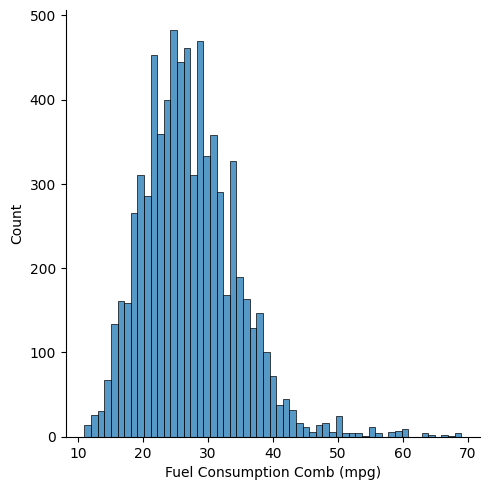

<Figure size 640x480 with 0 Axes>

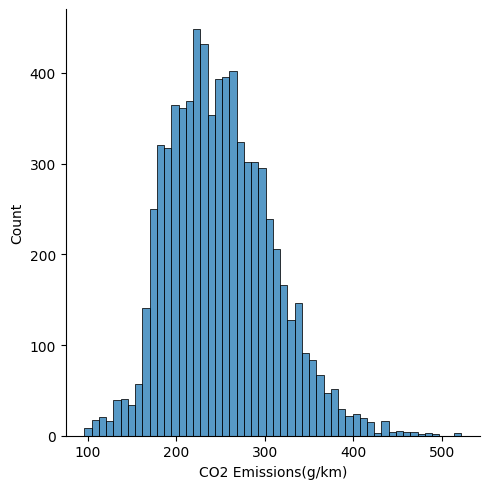

In [138]:
for col in emission_df.columns:
    plt.figure()
    sns.displot(x=emission_df[col],data=emission_df)
"""
# OBSERVATION -> The max number of car by a single company is 628 by ford
              -> The max number of particular model i.e. [F-150 FFV and F-150 FFV 4X4] are 32 
              -> The max vehicle class is 1217 of SUV small
              -> The most common engine size is 2.0L with 1460
              -> MOst common cylinders are 4 and 6
              -> The most common transmission is AS6 with 1324 cars having them
              -> The most common Fuel type is X as 3637 cars have them
              -> Most cars has fuel conumption for cities in betwwen 10-15 and the data is left skewed
              -> Most cars has fuel conumption on highways is 6-10 between and data is left skewed
              -> Combined fuel consumption follows the same pattern as pattern of city and highway
              -> Combined fuel consumption(mpg) has most vlues between (6-35) and data is left skewed
              -> CO2 emmission is between (200-300)
"""

#### Encoding

In [139]:
encoder=LabelEncoder()

In [140]:
for col in emission_df.select_dtypes("object").columns:
    print(col,len(emission_df[col].unique()))

Make 42
Model 2053
Vehicle Class 16
Transmission 27
Fuel Type 5


In [141]:
emission_df["Make"]=encoder.fit_transform(emission_df["Make"])
emission_df["Fuel Type"]=encoder.fit_transform(emission_df["Fuel Type"])
emission_df["Vehicle Class"]=encoder.fit_transform(emission_df["Vehicle Class"])
emission_df["Transmission"]=encoder.fit_transform(emission_df["Transmission"])

In [143]:
emission_df=emission_df.drop(["Model"],axis=1) # Dropping this column as there are a lot of uniqe categorical values encoding them and using them in the model could reduce the accuracy of the model

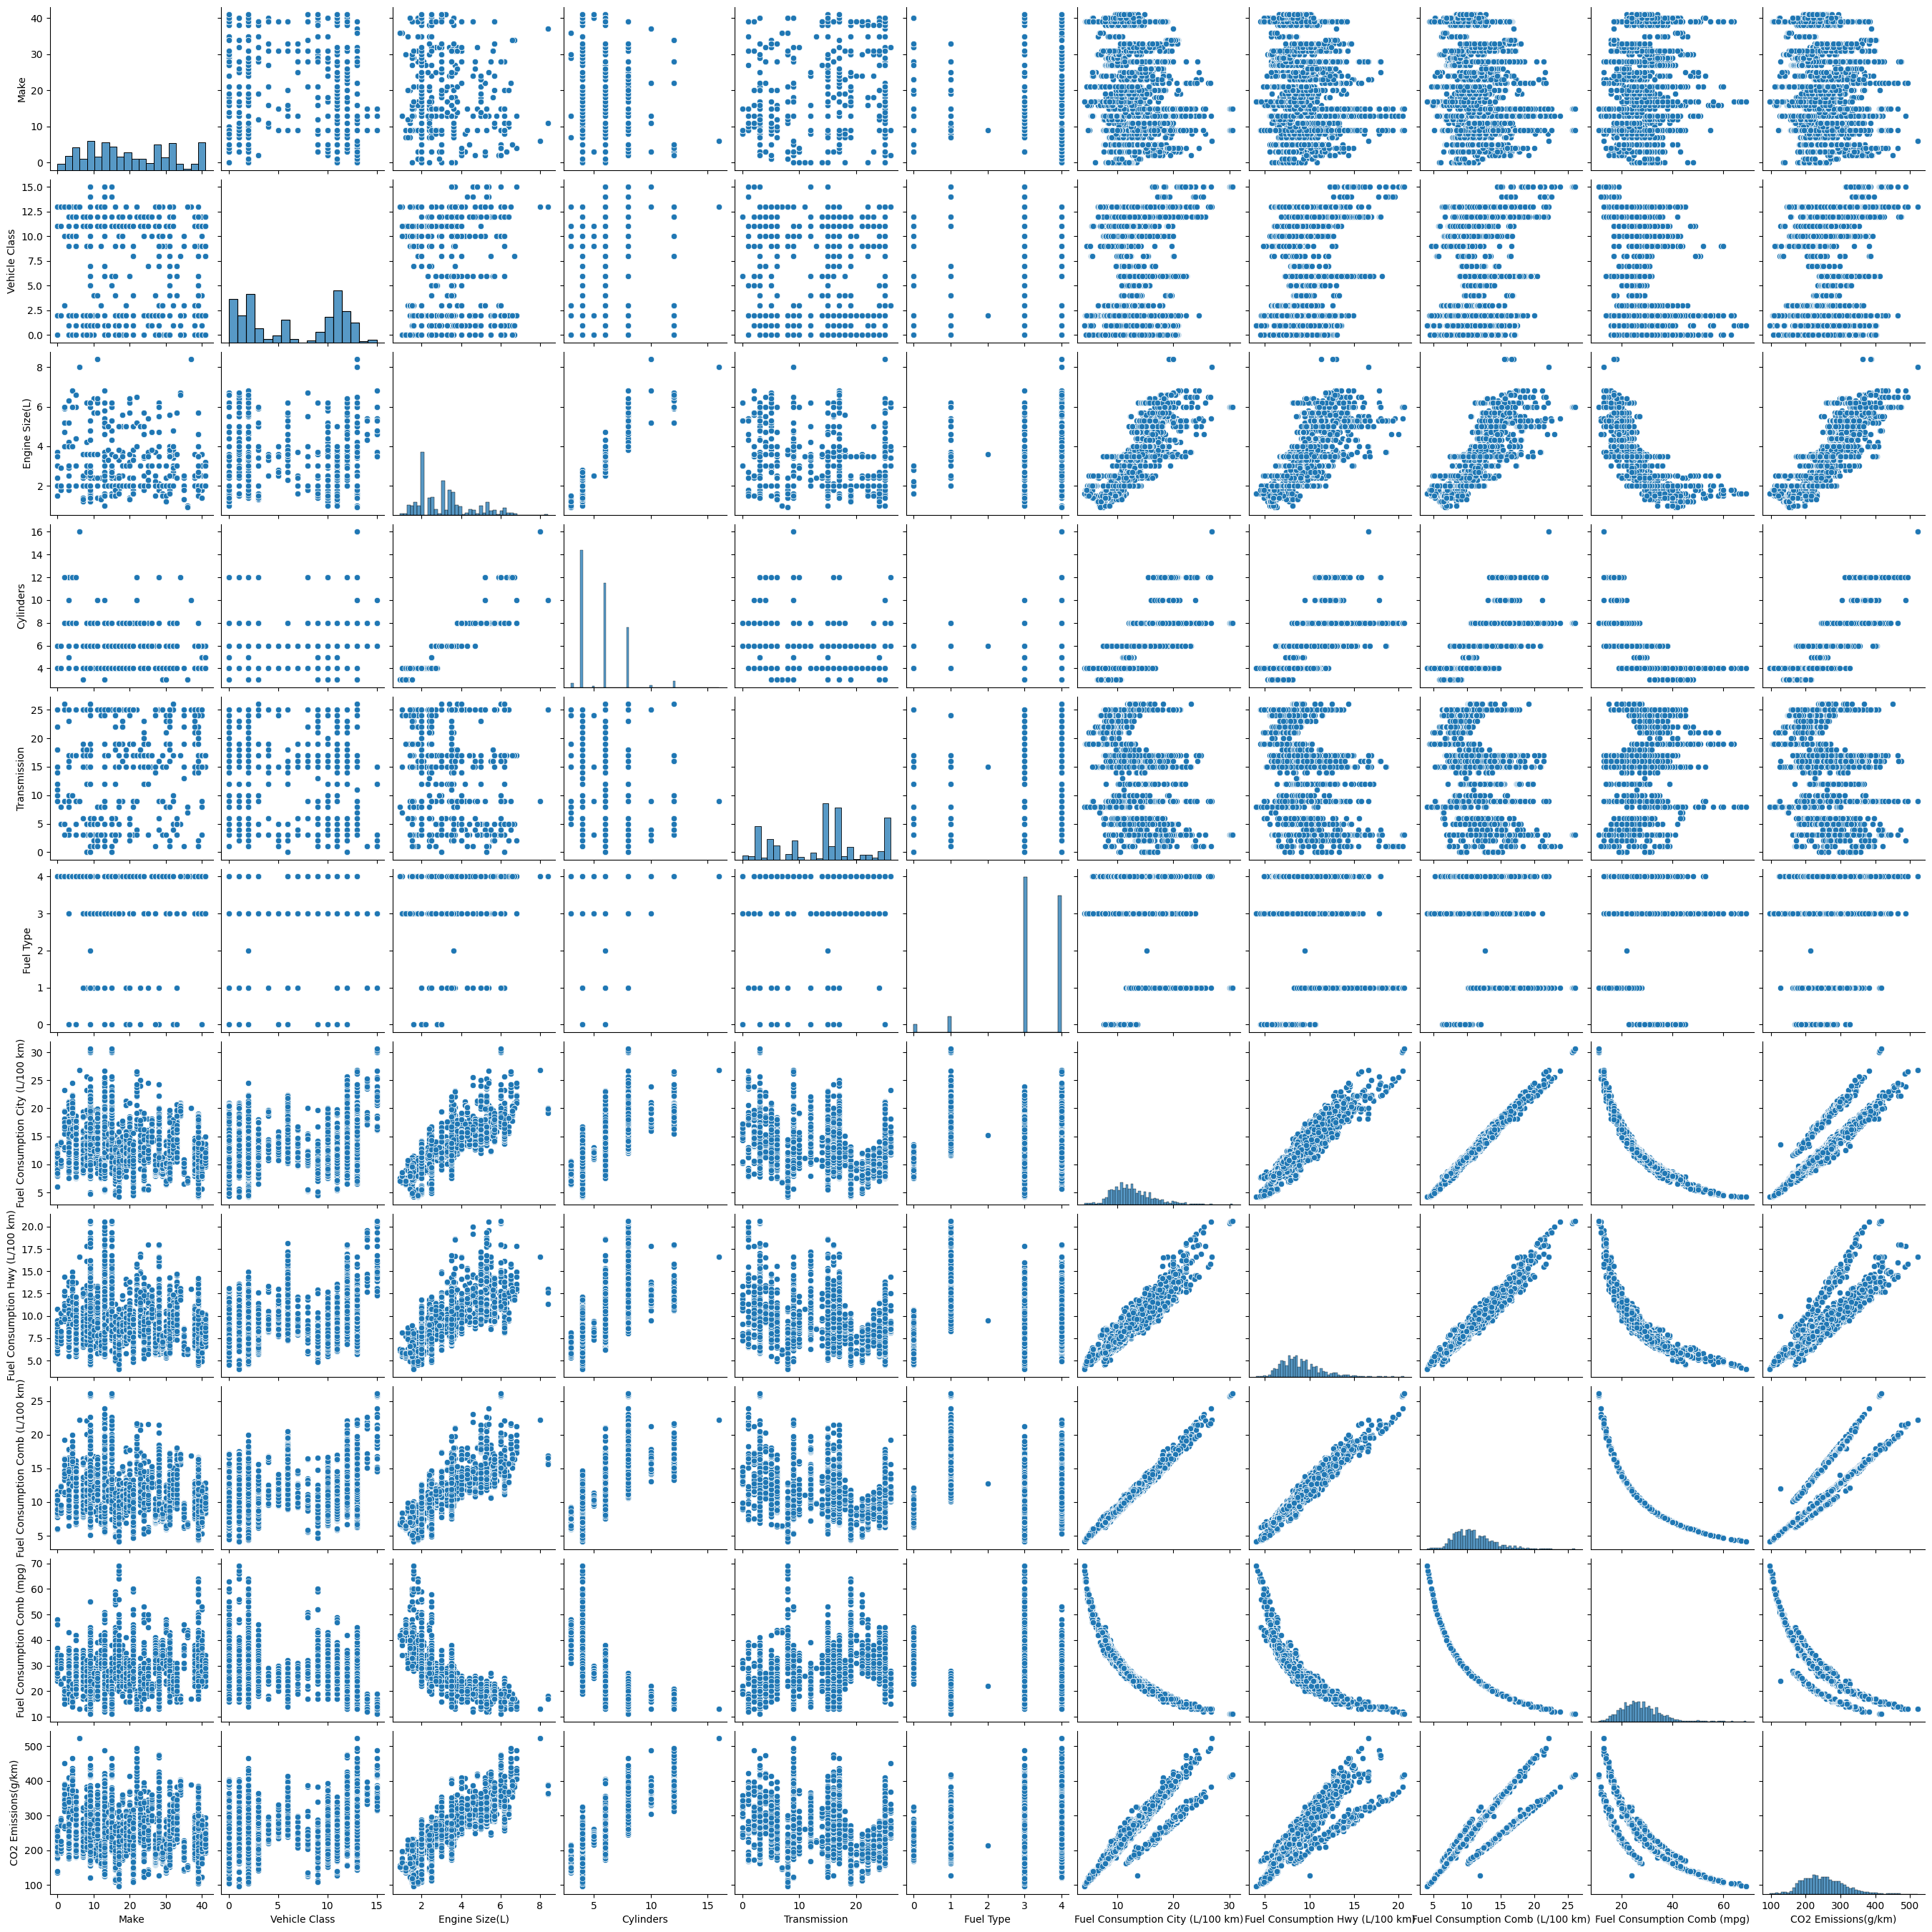

In [ ]:
sns.pairplot(emission_df)
# OBSERVATION -> Columns [Model ,Vehicle Class ,Transmission ] have a lot of unique catgorical values and there isn't a difference in data by a particular model ,transmission or vehicle class it's quite standard across all 

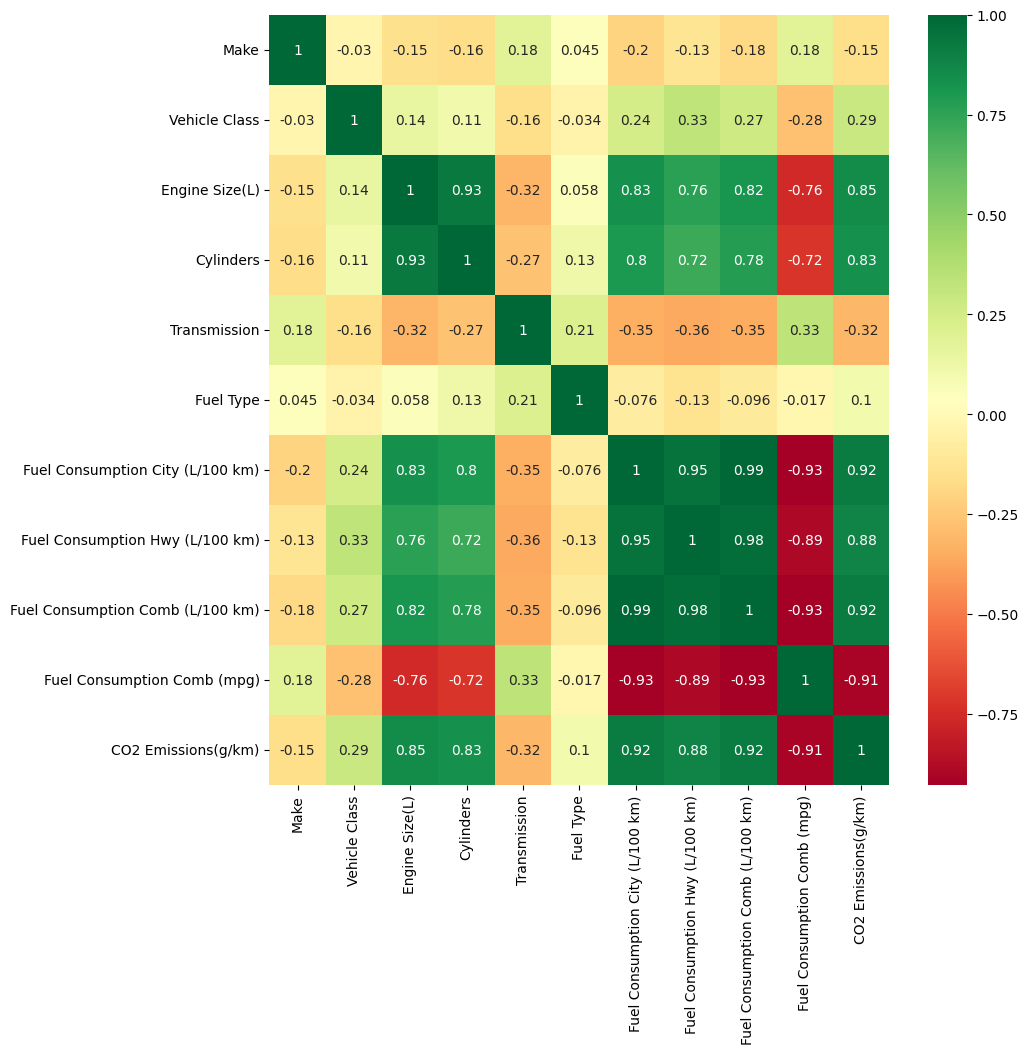

In [ ]:
corr=emission_df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr,cmap="RdYlGn",annot=True)
plt.show()
#OBSERVATION -> The multicolinearity between Fuel_Consumption_city,Fuel_Consumption_Highway is very high with Combined_fuel consumption as it is the average of both ,hence we can remove these columns 
#            -> Combined Fuel Consumption (mpg) is miles per gallon i.e. it is just another metric for fuel consumption 

In [150]:
emission_df.columns

Index(['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission',
       'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [151]:
emission_df.drop(['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)'],axis=1, inplace=True)

In [ ]:
emission_df.skew()
# Skewness of the data is good and is in range

Make                                0.255973
Vehicle Class                       0.003869
Engine Size(L)                      0.809181
Cylinders                           1.110415
Transmission                       -0.131820
Fuel Type                          -1.801497
Fuel Consumption Comb (L/100 km)    0.893316
Fuel Consumption Comb (mpg)         0.977034
CO2 Emissions(g/km)                 0.526094
dtype: float64

In [ ]:
emission_df.kurt()
# Kurt of the columns is in range , Fuel Type is categorical data hence we can ognore it's kurt

Make                               -1.071127
Vehicle Class                      -1.644188
Engine Size(L)                     -0.131963
Cylinders                           1.525175
Transmission                       -1.033974
Fuel Type                           3.809495
Fuel Consumption Comb (L/100 km)    1.393575
Fuel Consumption Comb (mpg)         2.499369
CO2 Emissions(g/km)                 0.478801
dtype: float64

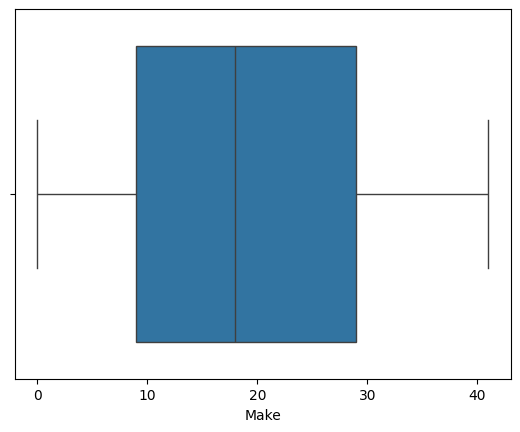

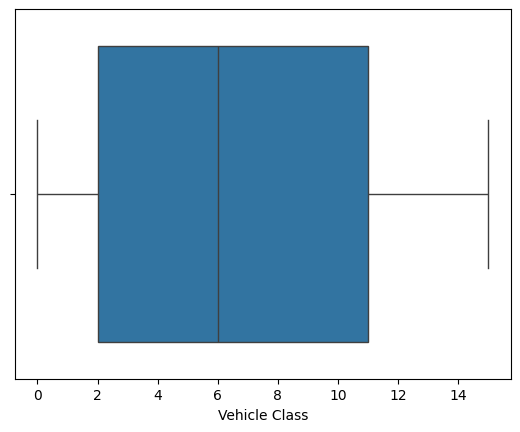

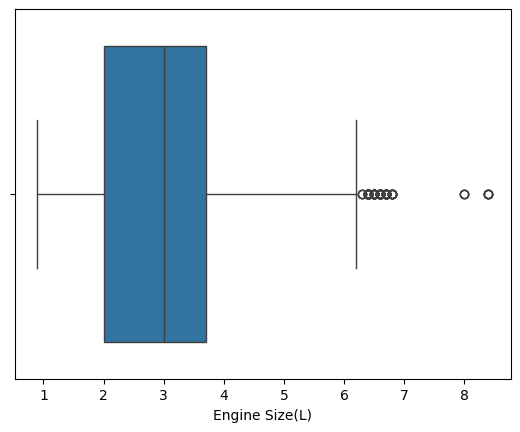

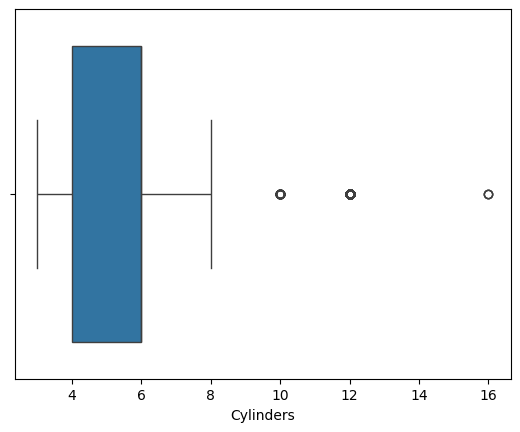

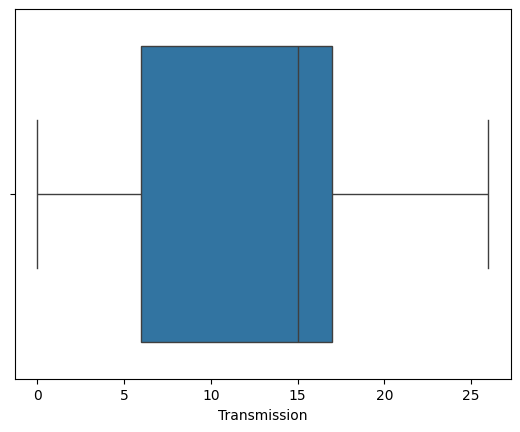

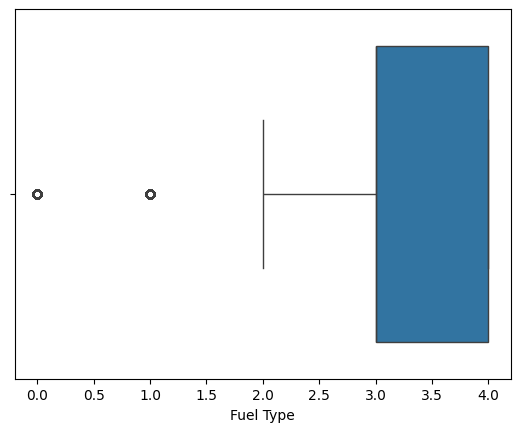

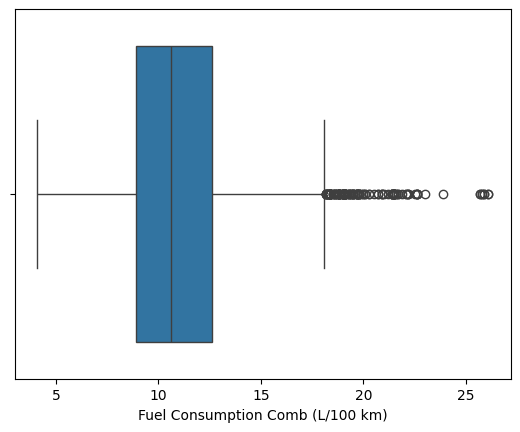

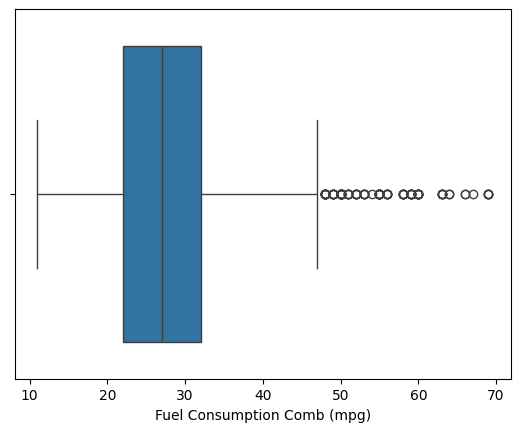

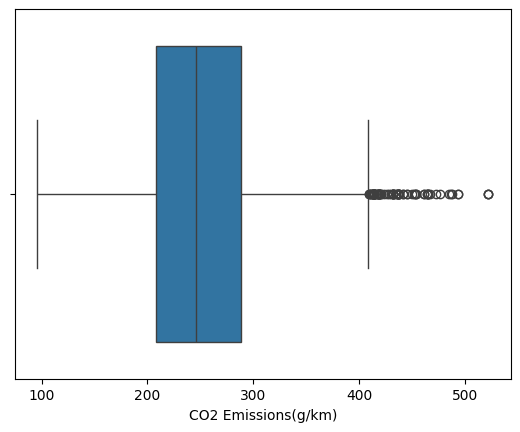

In [ ]:
for col in emission_df.columns:
    plt.figure()
    sns.boxplot(x=emission_df[col],data=emission_df)

# OBSERVATION -> There are outliers in Engine Size,FuelConsumption Comb, FuelConsumption Comb(mpg),CO2 emmission

### Removal of Outliers

In [155]:
from scipy.stats import zscore

In [204]:
print('Before outlier removal : ',emission_df.shape)
z = np.abs(zscore(emission_df, axis = 1))
z1=pd.DataFrame(z,columns=emission_df.columns)

threshold = 3
dataset = emission_df[(z < threshold).all(axis=1)]
print('After Z-Score approach : ',dataset.shape)
#Using Zscore we ere not able to remove outliers , because of that I will now to be using the IQR method

Before outlier removal :  (7385, 9)
After Z-Score approach :  (7385, 9)


In [ ]:
Q1 = emission_df.quantile(0.25)  # Q1
Q3 = emission_df.quantile(0.75)  # Q3
IQR = Q3-Q1
dataset = emission_df[~((emission_df<(Q1-1.5*IQR)) | (emission_df>(Q3+1.5*IQR)))]
print('After IQR approach : ',dataset.shape)
dataset.dropna()
# Using IQR method also the outliers were inside the 3-SD distance from the middle hence no outliers were removed  

After IQR approach :  (7385, 9)


Make  Vehicle Class  Engine Size(L)  Cylinders  Transmission  Fuel Type  \
0        0              0             2.0        4.0            14        4.0   
1        0              0             2.4        4.0            25        4.0   
3        0             11             3.5        6.0            15        4.0   
4        0             11             3.5        6.0            15        4.0   
5        0              2             3.5        6.0            15        4.0   
...    ...            ...             ...        ...           ...        ...   
7380    41             11             2.0        4.0            17        4.0   
7381    41             11             2.0        4.0            17        4.0   
7382    41             11             2.0        4.0            17        4.0   
7383    41             12             2.0        4.0            17        4.0   
7384    41             12             2.0        4.0            17        4.0   

      Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)  \
0                                  8.5                         33.0   
1                                  9.6                         29.0   
3                                 11.1                         25.0   
4                                 10.6                         27.0   
5                                 10.0                         28.0   
...                                ...                          ...   
7380                               9.4                         30.0   
7381                               9.9                         29.0   
7382                              10.3                         27.0   
7383                               9.9                         29.0   
7384                              10.7                         26.0   

      CO2 Emissions(g/km)  
0                   196.0  
1                   221.0  
3                   255.0  
4                   244.0  
5                   230.0  
...                   ...  
7380                219.0  
7381                232.0  
7382                240.0  
7383                232.0  
7384                248.0  

[6437 rows x 9 columns]

In [205]:
from sklearn.preprocessing import StandardScaler
std_scalar=StandardScaler()
scaled_data=std_scalar.fit_transform(dataset)
scaled_df=pd.DataFrame(scaled_data,columns=dataset.columns)
scaled_df.head()
# Scaled the data because in few columns the values were very low and in some values were very large , to counteract this difference in values i have scaled the data ,as if this difference would be left present in the data the accuracy of the model would be dropped 

Make  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0 -1.730214      -1.319720       -0.856721  -0.883408     -0.003824   
1 -1.730214      -1.319720       -0.561317  -0.883408      1.511325   
2 -1.730214      -1.319720       -1.225976  -0.883408      1.098102   
3 -1.730214       0.961192        0.251043   0.210575      0.133917   
4 -1.730214       0.961192        0.251043   0.210575      0.133917   

   Fuel Type  Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)  \
0   0.836161                         -0.855742                     0.763110   
1   0.836161                         -0.475423                     0.209966   
2   0.836161                         -1.754677                     2.837400   
3   0.836161                          0.043193                    -0.343178   
4   0.836161                         -0.129679                    -0.066606   

   CO2 Emissions(g/km)  
0            -0.932933  
1            -0.505646  
2            -1.958421  
3             0.075464  
4            -0.112542

#### First Trying with Linear Regression to get an base idea 

In [206]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=scaled_df.drop(["CO2 Emissions(g/km)"],axis=1)
Y=scaled_df["CO2 Emissions(g/km)"]

In [207]:
lr_model=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5908, 8)
(1477, 8)
(5908,)
(1477,)


In [208]:
from sklearn.metrics import r2_score
lr_model.fit(x_train,y_train)
y_predict_lr_train=lr_model.predict(x_train)
y_predict_lr_test=lr_model.predict(x_test)

In [210]:
print(r2_score(y_train,y_predict_lr_train))
print("\n")
print(r2_score(y_test,y_predict_lr_test))


0.9155109018008204


0.9159642598717492


##### Since the accuracy of Linear Regression is lower than the demand i will now use Boosting algorithm 

In [211]:
import xgboost as xgb
"""I'm Using Extreme Gradient boosing algorithm for the model to get the high accuracy"""
xg=xgb.XGBRegressor(learning_rate=0.078,
                    n_estimators=101,
                    max_depth = 15,
                    )
xg.fit(x_train,y_train)
y_predict_train = xg.predict(x_train)
y_predict_test = xg.predict(x_test)
print("Train R2:", r2_score(y_train, y_predict_train))
print("Test R2 :", r2_score(y_test, y_predict_test))

Train R2: 0.9994573137355763
Test R2 : 0.9966815836851833


### Ques 4 -> Create 3 clusters in range (3-9,9-15,15-22) and create 3 csv's for them 

In [213]:
tree_height_df=pd.read_csv(r"dataset_full_region_final.csv")
tree_height_df.head()

ID   Position_X   Position_Y  Position_Z  Tree_height  Crown_diameter  \
0   1 -3966667.386  2978915.100    150.3917      22.4962          8.9171   
1   2 -3966668.878  2978919.367    150.5403      22.1186          8.2185   
2   3 -3966625.563  2979189.037    148.7839      21.7631          9.9754   
3   4 -3966683.066  2979072.401    151.0279      21.2808          8.7273   
4   5 -3966672.112  2978917.194    150.5792      21.7777          8.2085   

   Crown_area  Crown_length  Crown_surface_area  Crown_volume  \
0     50.8483       20.4439            263.3468      346.5132   
1     37.3748       13.2852            148.7291      165.5102   
2     59.8634       19.6709            276.3241      392.5228   
3     47.5815       19.2805            240.4835      305.7994   
4     48.0518       18.2012            228.7342      291.5337   

   Diameter_at_breast_height  Coniferous_tree_volume  \
0                    31.3168                0.765922   
1                    30.0167                0.693226   
2                    31.2310                0.739827   
3                    29.2580                0.636661   
4                    29.4880                0.659940   

   Broad_leaved_tree_volume  Stem Biomass  Branch Biomass  Leaf Biomass  \
0                  0.665949      0.094888        0.012341      0.384417   
1                  0.607680      0.086882        0.011272      0.366465   
2                  0.644857      0.091766        0.011924      0.377501   
3                  0.561771      0.080377        0.010406      0.351315   
4                  0.580770      0.083121        0.010771      0.357771   

   Fruit Biomass  Root Biomass  Total Tree Biomass  Carbon Stock  
0       0.054029      4.187929            0.460871      0.230436  
1       0.050944      4.073428            0.427342      0.213671  
2       0.052837      4.144088            0.447844      0.223922  
3       0.048368      3.974947            0.399774      0.199887  
4       0.049463      4.017126            0.411439      0.205720

In [ ]:
tree_height_df.info()
# OBSERVATION -> There are 16125 records and 20 columns
# Columns -> [ID] is int64 type rest all are of float type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16125 entries, 0 to 16124
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         16125 non-null  int64  
 1   Position_X                 16125 non-null  float64
 2   Position_Y                 16125 non-null  float64
 3   Position_Z                 16125 non-null  float64
 4   Tree_height                16125 non-null  float64
 5   Crown_diameter             16125 non-null  float64
 6   Crown_area                 16125 non-null  float64
 7   Crown_length               16125 non-null  float64
 8   Crown_surface_area         16125 non-null  float64
 9   Crown_volume               16125 non-null  float64
 10  Diameter_at_breast_height  16125 non-null  float64
 11  Coniferous_tree_volume     16125 non-null  float64
 12  Broad_leaved_tree_volume   16125 non-null  float64
 13  Stem Biomass               16125 non-null  flo

In [218]:
tree_height_df.describe().T

# Columns ["crown_surface_area","Diameter_at_breast_height","Coniferous_tree_volume","Broad_leaved_tree_volume","Stem Biomass","Fruit Biomass","Branch Biomass"]columns could have outliers as there's a difference beween it's mean and 50% value

count          mean          std           min  \
ID                         16125.0  8.063000e+03  4655.030881  1.000000e+00   
Position_X                 16125.0 -3.966821e+06   111.464255 -3.967018e+06   
Position_Y                 16125.0  2.979006e+06   125.771950  2.978766e+06   
Position_Z                 16125.0  1.524299e+02     3.623049  1.420104e+02   
Tree_height                16125.0  1.019209e+01     3.048419  3.641100e+00   
Crown_diameter             16125.0  4.979053e+00     1.390919  1.524900e+00   
Crown_area                 16125.0  1.338689e+01     8.052192  1.228900e+00   
Crown_length               16125.0  6.669740e+00     3.181984  1.628600e+00   
Crown_surface_area         16125.0  4.816841e+01    34.743544  4.532100e+00   
Crown_volume               16125.0  3.639647e+01    38.194536  1.038800e+00   
Diameter_at_breast_height  16125.0  1.017672e+01     4.704731  1.238400e+00   
Coniferous_tree_volume     16125.0  6.008802e-02     0.064123  3.130000e-04   
Broad_leaved_tree_volume   16125.0  6.059472e-02     0.060471  4.050000e-04   
Stem Biomass               16125.0  9.116301e-03     0.008831  7.300000e-05   
Branch Biomass             16125.0  1.124115e-03     0.001118  8.000000e-06   
Leaf Biomass               16125.0  9.607372e-02     0.053297  7.858000e-03   
Fruit Biomass              16125.0  1.025124e-02     0.006832  4.530000e-04   
Root Biomass               16125.0  1.799644e+00     0.613181  4.392110e-01   
Total Tree Biomass         16125.0  5.876599e-02     0.049163  9.890000e-04   
Carbon Stock               16125.0  2.938299e-02     0.024581  4.940000e-04   

                                    25%           50%           75%  \
ID                         4.032000e+03  8.063000e+03  1.209400e+04   
Position_X                -3.966917e+06 -3.966827e+06 -3.966727e+06   
Position_Y                 2.978902e+06  2.979004e+06  2.979113e+06   
Position_Z                 1.503858e+02  1.518388e+02  1.544960e+02   
Tree_height                7.859900e+00  1.034090e+01  1.251490e+01   
Crown_diameter             3.929000e+00  4.827700e+00  5.872000e+00   
Crown_area                 7.356800e+00  1.124390e+01  1.759820e+01   
Crown_length               4.014500e+00  6.073900e+00  9.105900e+00   
Crown_surface_area         2.134910e+01  3.717120e+01  6.715790e+01   
Crown_volume               1.015220e+01  2.187570e+01  5.004710e+01   
Diameter_at_breast_height  6.383400e+00  9.904700e+00  1.361070e+01   
Coniferous_tree_volume     1.352600e-02  4.012600e-02  8.797200e-02   
Broad_leaved_tree_volume   1.521100e-02  4.273600e-02  8.939700e-02   
Stem Biomass               2.417000e-03  6.586000e-03  1.345200e-02   
Branch Biomass             2.840000e-04  7.960000e-04  1.657000e-03   
Leaf Biomass               5.248600e-02  9.041600e-02  1.332010e-01   
Fruit Biomass              4.673000e-03  9.119000e-03  1.468200e-02   
Root Biomass               1.320480e+00  1.809869e+00  2.265603e+00   
Total Tree Biomass         1.984900e-02  4.686000e-02  8.641100e-02   
Carbon Stock               9.925000e-03  2.343000e-02  4.320500e-02   

                                    max  
ID                         1.612500e+04  
Position_X                -3.966597e+06  
Position_Y                 2.979250e+06  
Position_Z                 1.632745e+02  
Tree_height                2.249620e+01  
Crown_diameter             1.200660e+01  
Crown_area                 7.401140e+01  
Crown_length               2.044390e+01  
Crown_surface_area         2.869914e+02  
Crown_volume               4.360416e+02  
Diameter_at_breast_height  3.131680e+01  
Coniferous_tree_volume     7.659220e-01  
Broad_leaved_tree_volume   6.659490e-01  
Stem Biomass               9.488800e-02  
Branch Biomass             1.234100e-02  
Leaf Biomass               3.844170e-01  
Fruit Biomass              5.402900e-02  
Root Biomass               4.187929e+00  
Total Tree Biomass         4.608710e-01  
Carbon Stock               2.304360e-

In [220]:
tree_height_df.isna().sum()
# There are n missing values in the data set

ID                           0
Position_X                   0
Position_Y                   0
Position_Z                   0
Tree_height                  0
Crown_diameter               0
Crown_area                   0
Crown_length                 0
Crown_surface_area           0
Crown_volume                 0
Diameter_at_breast_height    0
Coniferous_tree_volume       0
Broad_leaved_tree_volume     0
Stem Biomass                 0
Branch Biomass               0
Leaf Biomass                 0
Fruit Biomass                0
Root Biomass                 0
Total Tree Biomass           0
Carbon Stock                 0
dtype: int64

In [ ]:
tree_height_df.drop(["Tree_height"],axis=1,inplace=True)
# We have to create cluster based on Tree Height that's why dropping this column

In [224]:
tree_height_df.drop(["ID"],axis=1,inplace=True)
# ID is of no use as it will be always be unique for each record

### Univariant Analysis

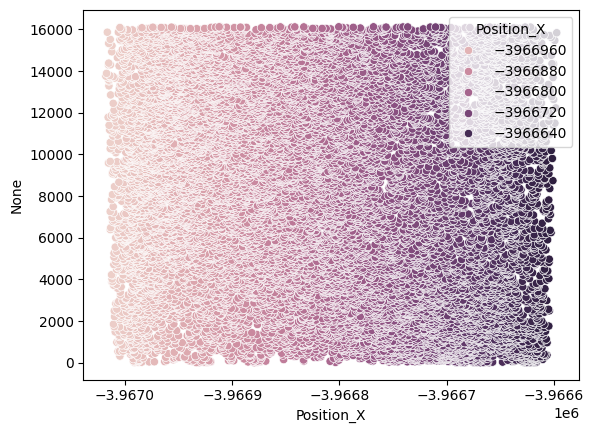

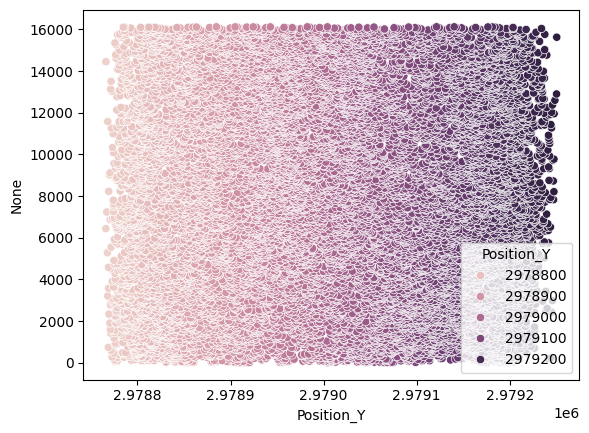

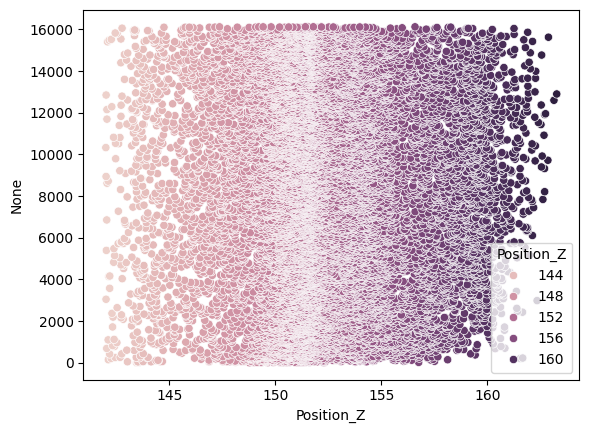

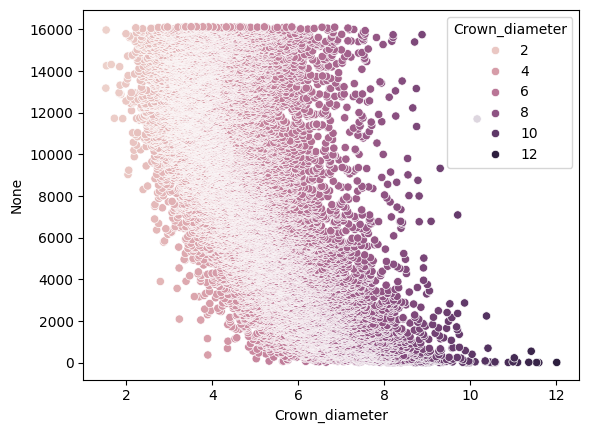

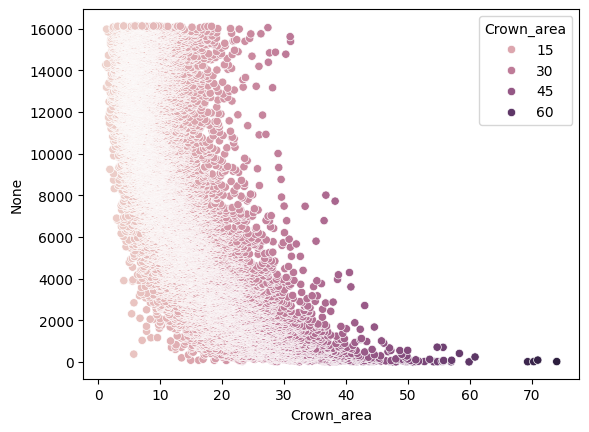

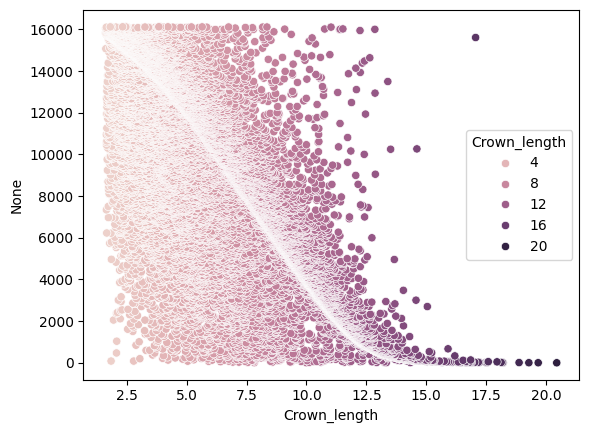

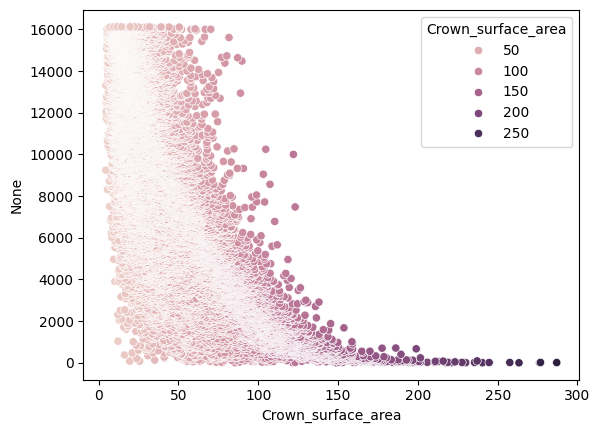

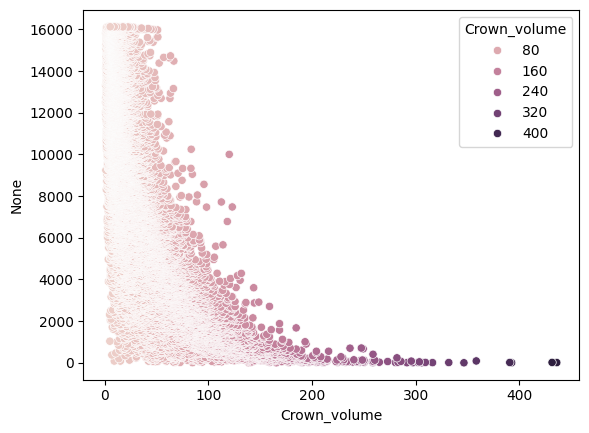

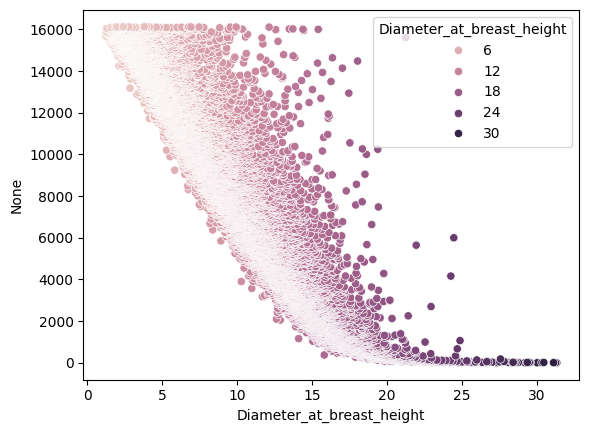

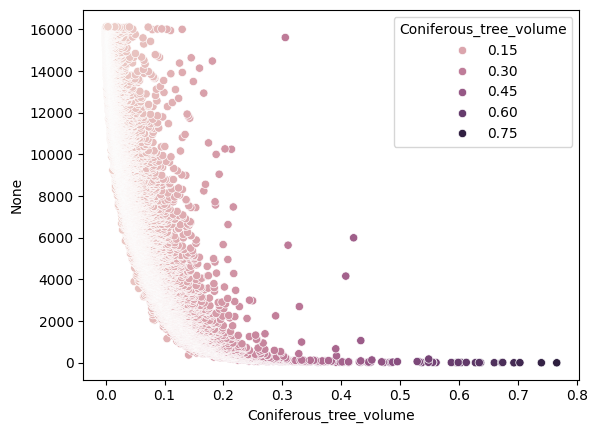

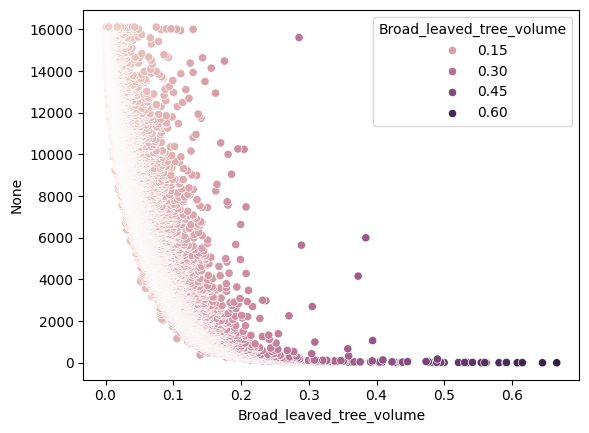

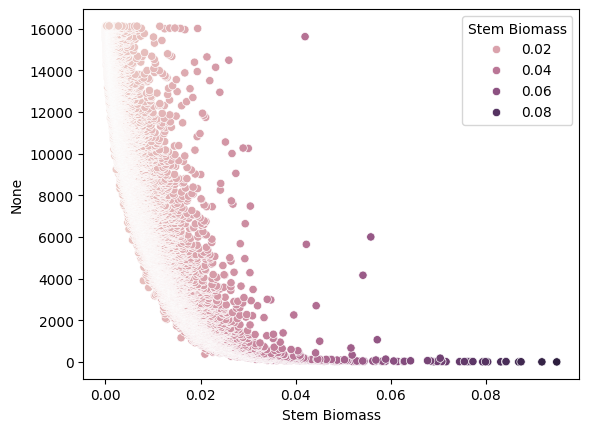

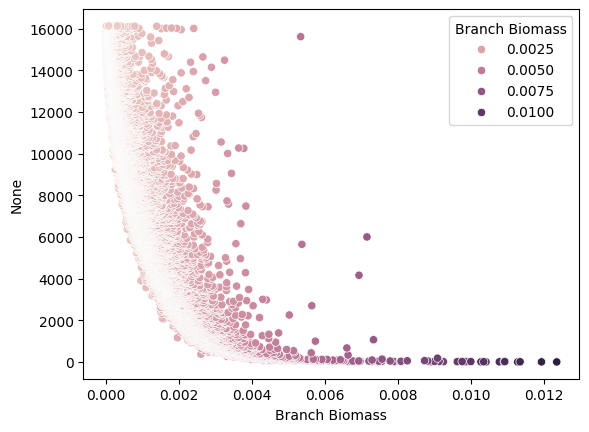

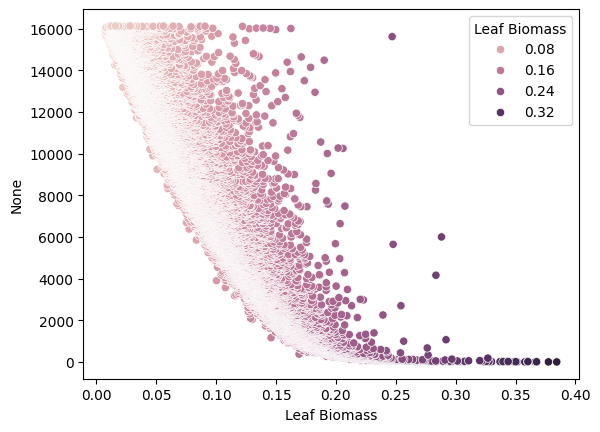

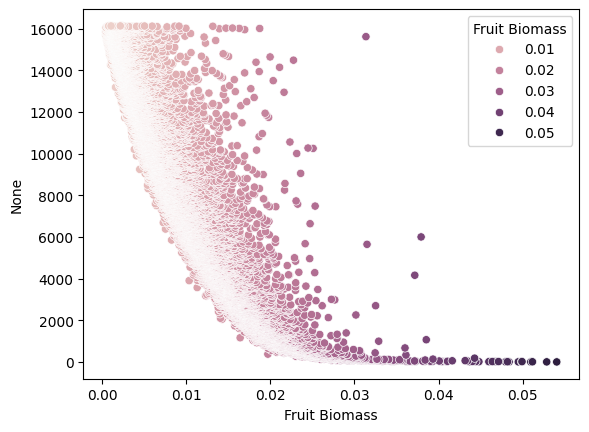

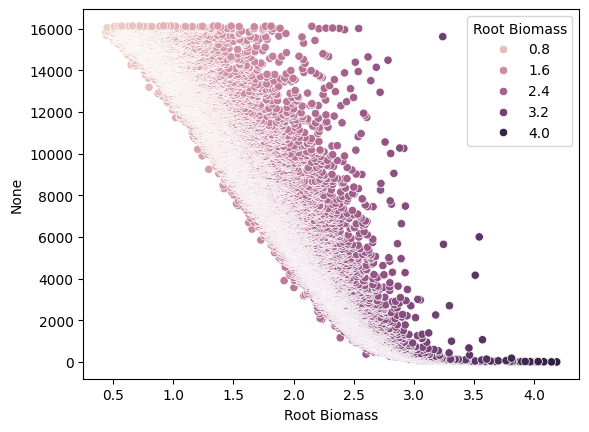

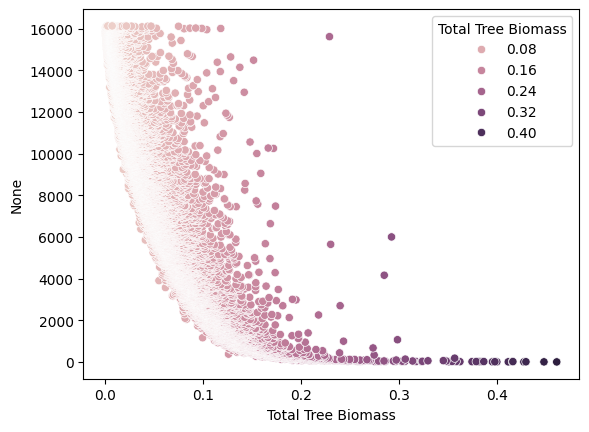

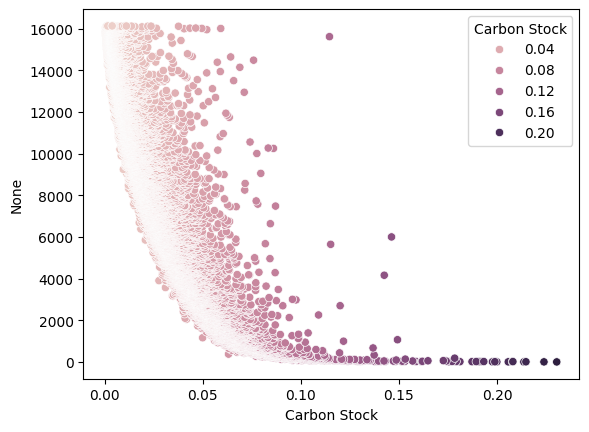

In [225]:
for col in tree_height_df.columns:
    plt.figure()
    sns.scatterplot(x=tree_height_df[col],data=tree_height_df,y=tree_height_df.index,hue=col)

#### Ques 5 Find the distance between two coins using openCv

In [2]:
import cv2
import numpy as np


In [3]:
import cv2
img=cv2.imread(r"coin.png",0)
cv2.imshow("Original Image",img)
blur_img=cv2.GaussianBlur(img,(5,5),0)
cv2.imshow("Blur Image",blur_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [58]:
canny_img=cv2.Canny(img,350,500)
cv2.imshow("Canny Image",canny_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:

# Load the image
image = cv2.imread('coin.png') 
output = image.copy()

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
gray = cv2.GaussianBlur(gray, (9, 9), 2)

# Detect circles using HoughCircles
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=50, param2=30, minRadius=0, maxRadius=0)

# Ensure at least one circle was found
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Extract center coordinates and radius
        center_x, center_y, radius = i[0], i[1], i[2]

        # Draw the circle and its center on the output image
        cv2.circle(output, (center_x, center_y), radius, (0, 255, 0), 2)
        cv2.circle(output, (center_x, center_y), 2, (0, 0, 255), 3)

        print(f"Center: ({center_x}, {center_y}), Radius: {radius}")

# Display the result
cv2.imshow('Detected Circles', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

Center: (436, 266), Radius: 38
Center: (216, 232), Radius: 40
Center: (348, 318), Radius: 41
Center: (250, 132), Radius: 34
Center: (356, 156), Radius: 42
Center: (178, 374), Radius: 39
Center: (374, 174), Radius: 27
Center: (334, 164), Radius: 22
Center: (352, 132), Radius: 18
Center: (312, 106), Radius: 37


In [5]:
import cv2
import numpy as np

# ====== Step 1: Read Image ======
img = cv2.imread("coin.png")
if img is None:
    raise ValueError("Image not found. Please check the path!")

# ====== Step 2: Preprocessing ======
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)

# ====== Step 3: Detect Circles using Hough Transform ======
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50,
                            param1=100, param2=30, minRadius=20, maxRadius=80)

# ====== Step 4: Extract Centers ======
centers = []
if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :]:
        centers.append((x, y))
        # Draw outer circle
        cv2.circle(img, (x, y), r, (0, 255, 0), 2)
        # Draw center point
        cv2.circle(img, (x, y), 2, (0, 0, 255), 3)
else:
    print("No coins detected!")

# ====== Step 5: Sort Coins by X-coordinate (Left to Right) ======
centers.sort(key=lambda c: c[0])

# ====== Step 6: Calculate Distance Between Adjacent Coins ======
for i in range(len(centers) - 1):
    (x1, y1) = centers[i]
    (x2, y2) = centers[i + 1]
    distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    print(f"Distance between coin {i+1} and coin {i+2}: {distance:.2f} pixels")
    
    # Draw connecting line between coins
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

# ====== Step 7: Display Result ======
cv2.imshow("Detected Coins and Distances", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\BAPS\AppData\Local\Temp\ipykernel_8812\3933287269.py:37: RuntimeWarning: overflow encountered in scalar subtract
  distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)


Distance between coin 1 and coin 2: 239.53 pixels
Distance between coin 2 and coin 3: 103.37 pixels
Distance between coin 3 and coin 4: 101.51 pixels
Distance between coin 4 and coin 5: 54.04 pixels
Distance between coin 5 and coin 6: 51.61 pixels
Distance between coin 6 and coin 7: 55.32 pixels
Distance between coin 7 and coin 8: 196.13 pixels
Distance between coin 8 and coin 9: 150.16 pixels
Distance between coin 9 and coin 10: 79.31 pixels
Distance between coin 10 and coin 11: 125.16 pixels
Distance between coin 11 and coin 12: 88.84 pixels
Distance between coin 12 and coin 13: 71.03 pixels


In [63]:
img_1=img.copy()
contours,hierarchy=cv2.findContours(canny_img,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE,offset=(2,2))

for contour in contours:
    approx=cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    corners=len(approx)
    if corners>5:
        shape_name="Circle"

    cv2.drawContours(img_1,[approx],0,(200,100,100),2)
    x=approx.ravel()[0]
    y=approx.ravel()[1] - 10
    # cv2.putText(img,shape_name,(x,y),cv2.FONT_HERSHEY_COMPLEX,0.7,(255,255,245))
    print(shape_name,"\n",approx,"\n")

cv2.imshow("Contours",img_1)
cv2.waitKey(0)
cv2.destroyAllWindows()

Circle 
 [[[158 410]]

 [[160 412]]

 [[161 412]]

 [[160 412]]] 

Circle 
 [[[155 405]]

 [[155 406]]

 [[156 406]]

 [[161 410]]

 [[166 412]]

 [[167 413]]

 [[166 414]]

 [[164 414]]

 [[163 413]]

 [[164 414]]

 [[166 414]]

 [[168 415]]

 [[166 414]]

 [[168 413]]

 [[161 410]]] 

Circle 
 [[[160 399]]

 [[160 400]]

 [[165 404]]

 [[169 405]]

 [[170 406]]

 [[172 406]]

 [[168 405]]

 [[167 404]]

 [[169 403]]

 [[165 401]]

 [[163 399]]

 [[168 403]]

 [[167 404]]

 [[164 403]]] 

Circle 
 [[[167 392]]

 [[167 394]]

 [[168 394]]

 [[167 393]]

 [[168 392]]

 [[169 392]]

 [[170 393]]

 [[169 392]]] 

Circle 
 [[[198 391]]

 [[199 390]]

 [[202 390]]

 [[203 391]]

 [[201 393]]

 [[200 393]]] 

Circle 
 [[[198 390]]

 [[198 392]]

 [[199 393]]

 [[202 393]]

 [[203 392]]

 [[203 390]]] 

Circle 
 [[[200 385]]

 [[202 385]]

 [[204 387]]

 [[203 388]]

 [[202 388]]

 [[201 387]]

 [[202 388]]

 [[203 388]]

 [[204 387]]

 [[202 385]]] 

Circle 
 [[[185 379]]

 [[185 381]]] 

Ci

In [ ]:
# coin_template_img=cv2.imread(r"image copy.png")
# h,w=coin_template_img.shape[:2]
# method=cv2.TM_SQDIFF

# coin_copy_img=img.copy()

# result= cv2.matchTemplate(img,coin_template_img,method)
# min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(result)
# if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
#     location = min_loc
# else:
#     location=max_loc
# bottom_right=(location[0]+w,location[1]+h)
# string=f"Match"
# cv2.rectangle(coin_copy_img,location,bottom_right,(0,0,255),3)
# cv2.imshow(string,coin_copy_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()